### Gaussian Filter

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
from skimage import io,filters
from matplotlib import pyplot as plt

In [2]:
img=io.imread('Pothole_dataset/Person_dataset/PNGImages/Person1.jpg')
imgPothole=io.imread('Pothole_dataset/potholes/44.jpg')
gaussianImg=filters.gaussian(img,sigma=2)
gaussianImgPothole=filters.gaussian(imgPothole,sigma=2)

c:\users\swarali\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\swarali\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  after removing the cwd from sys.path.


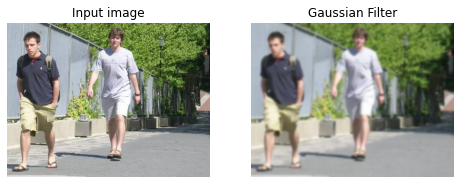

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


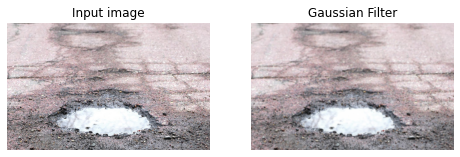

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(gaussianImg)
ax2.set_title('Gaussian Filter')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(imgPothole)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(gaussianImgPothole)
ax2.set_title('Gaussian Filter')
plt.show()

### Histogram of Oriented Gradients

In [15]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


In [29]:
image =io.imread('Pothole_dataset/Person_dataset/PNGImages/Person1.jpg')
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(10, 10),
                    cells_per_block=(3, 3), visualize=True, multichannel=True)

fd, hog_imagePothole = hog(imgPothole, orientations=9, pixels_per_cell=(10, 10),
                    cells_per_block=(3, 3), visualize=True, multichannel=True)



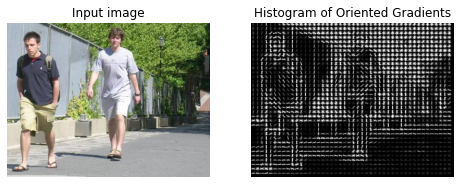

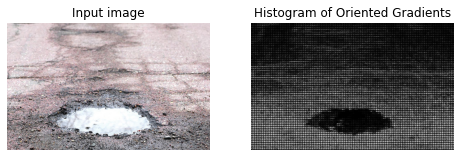

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(imgPothole, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaledPothole = exposure.rescale_intensity(hog_imagePothole, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaledPothole, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### Sobel

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

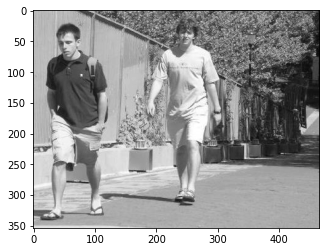

In [37]:
img0 =cv2.imread('Pothole_dataset/Person_dataset/PNGImages/Person1.jpg')
      
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = 'gray')
# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)


In [32]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
sobelxPothole=  cv2.Sobel(imgPothole,cv2.CV_64F,1,0,ksize=5)

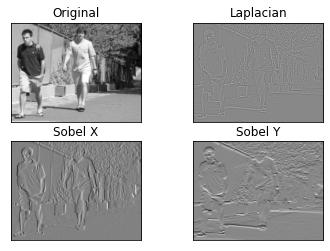

In [22]:

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

### Canny

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

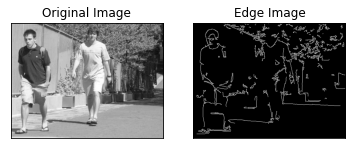

In [7]:
img = cv2.imread('Pothole_dataset/Person_dataset/PNGImages/Person1.jpg',0)
edges = cv2.Canny(img,600,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()



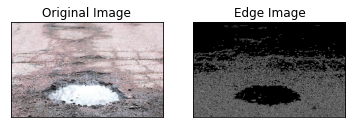

In [26]:

edgesPothole = cv2.Canny(imgPothole,100,200)
plt.subplot(121),plt.imshow(imgPothole,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edgesPothole,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Canny'), ([], []), ([], []))

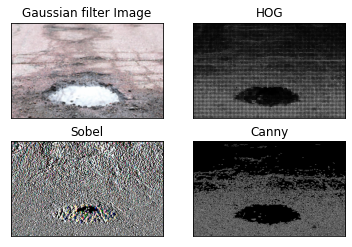

In [33]:
plt.subplot(221),plt.imshow(gaussianImgPothole,cmap = 'gray')
plt.title('Gaussian filter Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(hog_image_rescaledPothole,cmap = 'gray')
plt.title('HOG'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(sobelxPothole,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(edgesPothole,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Canny'), ([], []), ([], []))

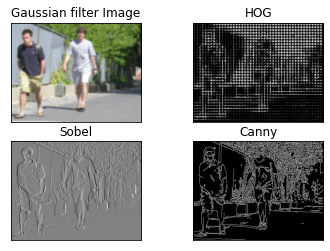

In [36]:
plt.subplot(221),plt.imshow(gaussianImg,cmap = 'gray')
plt.title('Gaussian filter Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(hog_image_rescaled,cmap = 'gray')
plt.title('HOG'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])